# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news Express has created a new landing page and would like to see if the new landing page has converted more visitors to subscribers. They chose 100 visitors to launch the page and would now like to compare the outcome of the treatment group to the control of the original page. 

#### Objectives
    Perform statistical analysis at a 5% significance level to determine the effectiveness of the new landing page based on time spent, conversions, and whether native language has an effect on time spent and or conversions. 

## Import all the necessary libraries

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [2]:
data = pd.read_csv('abtest.csv')
df = data.copy()
df.info() #lists the colums with datatype, and counts entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head() #shows the first 5 rows of the data

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail() #shows the last 5 rows of the data

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
df.shape
#gives the number of rows and colums for the dataset. 

(100, 6)

In [6]:
df.isnull().sum() 
#counts null values for each column


user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [7]:
df['user_id'].nunique() #counts how many unique values there are for the 'user_id'

100

In [8]:
df.duplicated().sum() #validates code above for duplicates. 

0

The number of unique values for 'user_id' is equal to the number of rows in the dataset we can conclude that no user ids are duplicated. 

### Univariate Analysis

In [9]:
df['user_id'] = df['user_id'].astype(str) #Changes 'user_id' from int64 to string object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    object 
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


In [10]:
df[df['group']=='control'].count() #counts how many users are in control group. 


user_id                   50
group                     50
landing_page              50
time_spent_on_the_page    50
converted                 50
language_preferred        50
dtype: int64

In [11]:
df[df['group']=='treatment'].count() #counts how many users are in treatment group. 


user_id                   50
group                     50
landing_page              50
time_spent_on_the_page    50
converted                 50
language_preferred        50
dtype: int64

In [12]:
df.describe().T # Gives statistacal summary of numeric columns. 

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


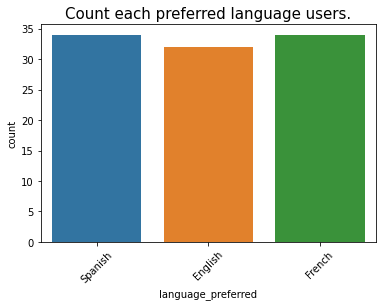

In [44]:
a=sns.countplot(data=df,x='language_preferred')
plt.xticks(rotation=45)
a.set_title("Count each preferred language users.", fontsize=15)
plt.show()

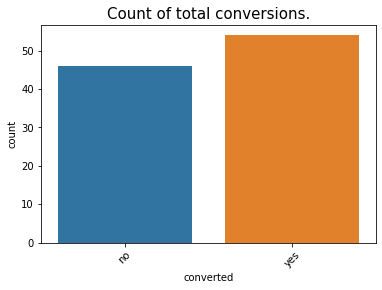

In [45]:
b=sns.countplot(data=data,x='converted')
plt.xticks(rotation=45)
b.set_title("Count of total conversions.", fontsize=15)
plt.show()

### Bivariate Analysis

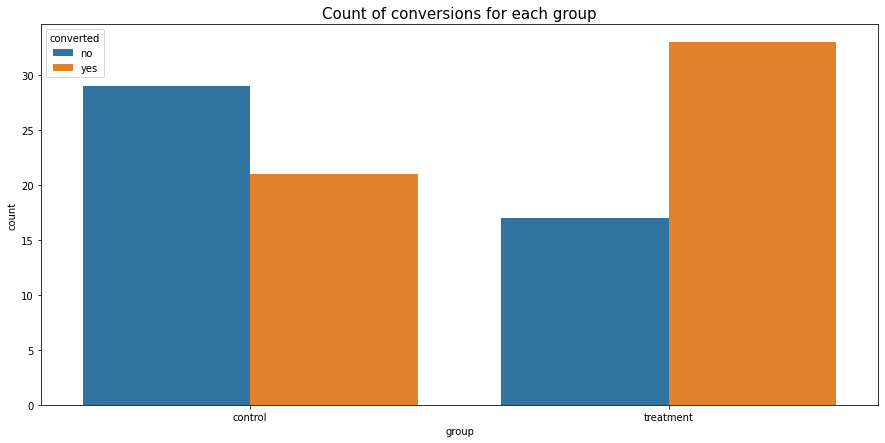

In [15]:
#Plots the count of converts per group.
plt.figure(figsize = (15, 7))
c=sns.countplot(data=df, x = 'group', hue = 'converted')
c.set_title("Count of conversions for each group", fontsize=15)
plt.show()

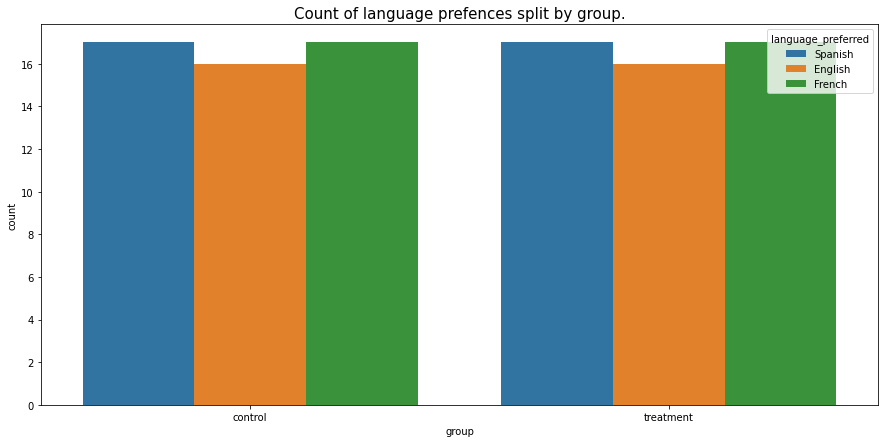

In [16]:
#Plots the count of language prefernces per group
plt.figure(figsize = (15, 7))
d=sns.countplot(data=df, x = 'group', hue='language_preferred')
d.set_title("Count of language prefences split by group.", fontsize=15)
plt.show()

In [17]:
# Creates a table with only control group participants
cx = (df[df['group']=='control'])
cx.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English
10,546588,control,old,6.21,yes,Spanish
11,546546,control,old,2.58,yes,English
14,546578,control,old,8.72,yes,Spanish
17,546555,control,old,0.40,no,English
18,546493,control,old,10.30,yes,English


In [18]:
# Creates a table with only new landing page participants. 
tx = (df[df['group']=='treatment'])
tx.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

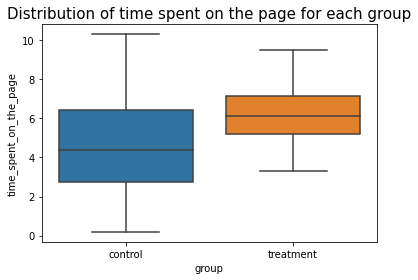

In [19]:
# Creates a box plot for the median and quartiles of time spent on the page for each group. 
e = sns.boxplot(data=df,x='group',y='time_spent_on_the_page',showfliers=False) # showfliers parameter controls the representation of outliers in the boxplot
e.set_title("Distribution of time spent on the page for each group", fontsize=15)
plt.show()

In [20]:
print('Sample mean for control =',cx['time_spent_on_the_page'].mean())

Sample mean for control = 4.532400000000001


In [21]:
print('Sample mean for treatment =',tx['time_spent_on_the_page'].mean())

Sample mean for treatment = 6.2232


### Step 1: Define the null and alternate hypotheses

#### Ho: The mean time spent on the new and old landing page is the same.
#### Ha: The mean time spent on the new landing page is greater than that to the old landing page. 

### Step 2: Select Appropriate test

Two Sample paired t-test

### Step 3: Decide the significance level

As given in the problem statement, we select α=0.05.

### Step 4: Collect and prepare data

### Tables needed to seperate the two samples were created above.
### cx = control group   tx = treatment group

In [22]:
time_on_cx = cx['time_spent_on_the_page']
time_on_tx = tx['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [23]:
# import the required function
from scipy.stats import ttest_rel

# find the p-value
test_stat, p_value  = ttest_rel(time_on_tx, time_on_cx, alternative = 'greater')  
print('The p-value is', p_value)

The p-value is 0.00029910900937037973


### Step 6: Compare the p-value with $\alpha$

In [24]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.00029910900937037973 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The p-value far less than the 5% threshold, so we reject the null hypothesis and accept the alternative that the time spent of the page is longer for the new landing page.


**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

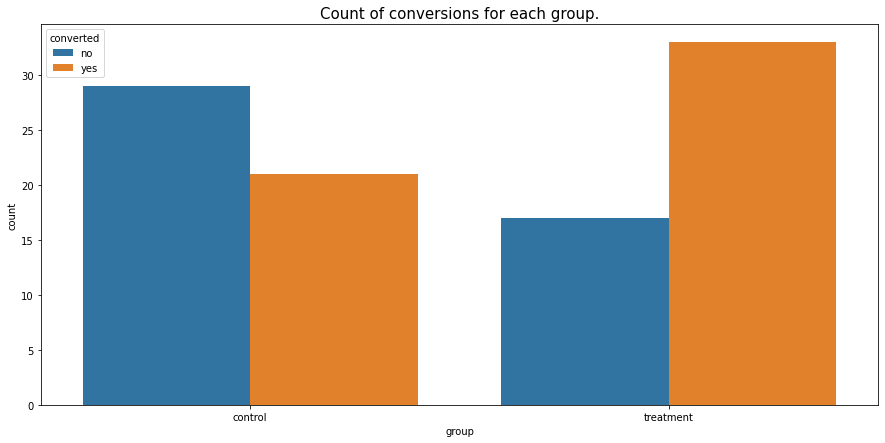

In [25]:
#Plots the count of converts per group.
plt.figure(figsize = (15, 7))
f=sns.countplot(data=df, x = 'group', hue = 'converted')
f.set_title("Count of conversions for each group.", fontsize=15)
plt.show()

In [26]:
cx.loc[cx['converted']=='yes'].count()

user_id                   21
group                     21
landing_page              21
time_spent_on_the_page    21
converted                 21
language_preferred        21
dtype: int64

In [27]:
tx.loc[tx['converted']=='yes'].count()

user_id                   33
group                     33
landing_page              33
time_spent_on_the_page    33
converted                 33
language_preferred        33
dtype: int64

In [28]:
print('The number of control samples: ', cx.shape[0])

The number of control samples:  50


In [29]:
print('The number of treatment samples: ', tx.shape[0])

The number of treatment samples:  50


For the new page we have 33/50 conversions
and for the old page we have 21/50 conversions. 

### Define the Hypothesis
#### Ho: proportion of 'yes' conversions from the old page is equal to that of the new page.

#### Ha: The proportion of the 'yes'conversions from the new page is greater than that of the old page.

Ho: p1 = p2
Ha: p1 != p2

### Select the Test and set the significance

We will use a Two proportions z-test with a significance level set by the problem statment of  α=0.05.

### Collect the Data
For the new page we have 33/50 conversions
and for the old page we have 21/50 conversions. 

### Find the p-value

In [30]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of yes conversions
yes_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(yes_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Compare the p-value with  $\alpha$

In [31]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Draw inference

As the p-value is less than the level of significance, we know that the 2 proportions are not equal, and the new landing page did have an higher rate of conversion that the old page.  

## 3. Are the conversion and preferred language independent or related?

### Visualize the data

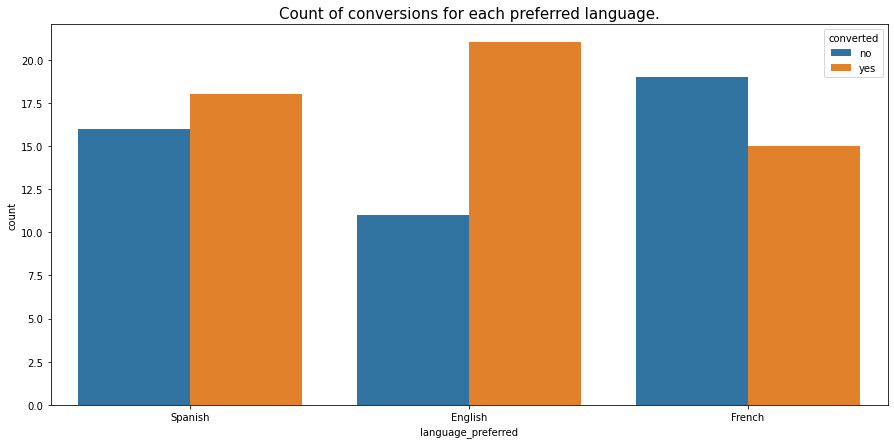

In [32]:
#Plots the count of language prefernces per conversion
plt.figure(figsize = (15, 7))
g=sns.countplot(data=df, x = 'language_preferred', hue='converted')
g.set_title("Count of conversions for each preferred language.", fontsize=15)
plt.show()

### Define the Hypothesis
#### Ho: Conversion is independent of preferred language.

#### Ha: Conversion depends on preferred language.


### Select the Test and set the significance¶
We will use the Chi-square test for Independence with a significance level set by the problem statment of α=0.05.

### Collect the Data

In [33]:
# Creates a filtered table with just preferred language and conversion information.
lang_convert = df.filter(items = ['language_preferred', 'converted'])
lang_convert.head()

,language_preferred,converted
0,Spanish,no
1,English,yes
2,Spanish,no
3,French,no
4,Spanish,yes


In [34]:
# Creates a table where filtered data from abouve is grouped by language prefence and conversions are counted. 
lan_count=lang_convert.groupby(['language_preferred','converted'], as_index = False)['converted'].size()
lan_count

,language_preferred,converted,size
0,English,no,11
1,English,yes,21
2,French,no,19
3,French,yes,15
4,Spanish,no,16
5,Spanish,yes,18


In [35]:
#Pivots the information derived from above in order to create the contingency table. 
lc = lan_count.pivot(index='language_preferred', values = 'size', columns='converted').reset_index()
lc

converted,language_preferred,no,yes
0,English,11,21
1,French,19,15
2,Spanish,16,18


### Find the p-value

In [36]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(lc.drop('language_preferred', axis = 1))
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Compare the p-value with  $\alpha$

In [37]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Draw inference

The p-value at .21 is far larger than the level of significance and we have enough evidence to conclude that the language is independent of conversion. 

## 4. Is the time spent on the new page same for the different language users?

### Visualize the data

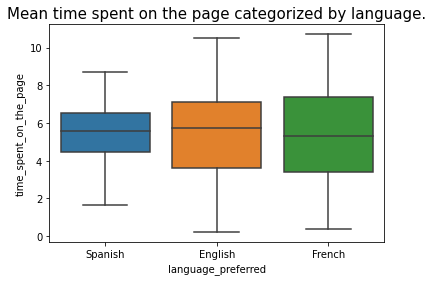

In [38]:
# Creates a box plot for the median and quartiles of time spent on the page for each language. 
h=sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page',showfliers=False) # showfliers parameter controls the representation of outliers in the boxplot
h.set_title("Mean time spent on the page categorized by language.", fontsize=15)
plt.show()

### Define the Hypothesis
#### Ho: The mean time spent on the page is the same for all preferred languages.

#### Ha: At least one mean time for a language differs from the others. 

### Select the Test and set the significance¶
We will use the One-Way ANOVA Test with a significance level set by the problem statment of α=0.05.

### Collect the Data

In [39]:
lang_time = df.filter(items = ['language_preferred', 'time_spent_on_the_page'])
lang_time

,language_preferred,time_spent_on_the_page
0,Spanish,3.48
1,English,7.13
2,Spanish,4.40
3,French,3.02
4,Spanish,4.75
...,...,...
95,Spanish,5.15
96,English,6.52
97,Spanish,7.07
98,Spanish,6.20


In [40]:
lang_time.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

In [41]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = lang_time[lang_time['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = lang_time[lang_time['language_preferred']=='French']['time_spent_on_the_page']  
time_spent_Spanish = lang_time[lang_time['language_preferred']=='Spanish']['time_spent_on_the_page']

### Find the p-value

In [42]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(time_spent_English,
                              time_spent_French,
                              time_spent_Spanish)
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


### Compare the p-value with  $\alpha$

In [43]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8665610536012648 is greater than the level of significance, we fail to reject the null hypothesis.


### Draw inference

The p-value is greater than the level of significance so we have evidence to accept the null hypothesis that the mean time spent on the page is the same for each of the preferred languages.  

## Conclusion and Business Recommendations

### Summary of Statistical Test Inferences
- The p-value far less than the 5% threshold, so we reject the null hypothesis and accept the alternative that the time spent of the page is longer for the new landing page.
- As the p-value is less than the level of significance, we know that the 2 proportions are not equal, and the new landing page did have an higher rate of conversion that the old page.
- The p-value at .21 is far larger than the level of significance and we have enough evidence to conclude that the language is independent of conversion.
- The p-value is greater than the level of significance so we have evidence to accept the null hypothesis that the mean time spent on the page is the same for each of the preferred languages.


### Interpretation 

 - We can see that there is evidence to suggest that the new landing page has a positive effect on the time spent on the page as well as the conversions for the page.
 - We are also able to support the idea that language was independent of converting to a subscriber and that time spent on the page was the same for each of the languages. 
 - Statistical testing supports rolling out the new landing page for the site will have the desired effect of keeping users engaged long enough to convert them to subscribers. 

### Next Steps
 - Include another round of evaluation with a new sample in order to study bias. The positive outcome that we see above could be attributed to the novelty effect and can be further studied by rerunning the sample at different times after site launch. 

___